In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [2]:
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수:\n',X)
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X) 
print('변환된 2차 다항식 계수:\n',poly_ftr) #1, x1, x2, x1^2, x1*x2, x2^2

일차 단항식 계수:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [3]:
def polynomial_func(X):
    y=1+2*X+X**2+X**3
    return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y= polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [[ 1  5]
 [17 43]]


In [4]:
from sklearn.linear_model import LinearRegression
poly_ftr =PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [5]:
model =LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:',model.coef_.shape)

Polynomial 회귀 계수 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape: (2, 10)


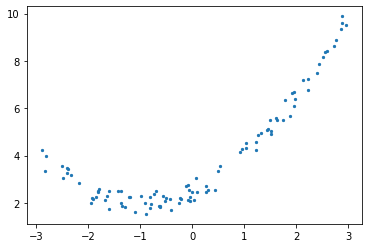

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

[[0.97413076 0.51044521]]


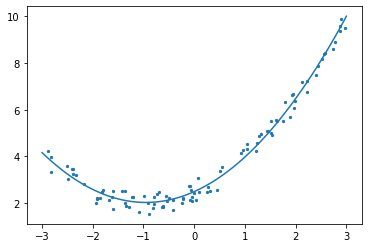

In [7]:
from sklearn.pipeline import make_pipeline   

model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)
xx = np.linspace(-3, 3, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)